In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'Pie_chart'

In [9]:
def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

# 단일 파이그래프

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
------------------------------
['독일', '프랑스', '중국', '영국']
      4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                         
독일  

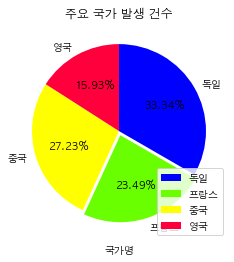

In [10]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)

# 나타내고자 하는 data
print(data1.columns)
print('-'*30)
my_concern = [item for item in data1.index if item in ['독일', '프랑스', '중국', '영국']]
print(my_concern)
pie_data = data1.loc[my_concern]
print(pie_data)
print('-'*30)

chartdata = pie_data['4월06일']
print(chartdata)
print('-'*30)
print(type(chartdata))
print('-'*30)

# pie chart의 label => 각 국가의 이름이 담긴 List
label = chartdata.index
print(label)
print('-'*30)

colors = ['blue', '#6AFF00', 'yellow', '#FF003C']


# draw chart
fig1 = plt.figure()

# shadow = Pie chart에 그림자가 지게 하도록 하는 파라미터
# explode : 2번째 값이 밖으로 빠지게 하는 파라미터
# autopct : 소수점 둘째짜리 까지 %로 명시하겠다는 파라미터
# startangle : 90도부터가 시작이다
# counterclock = False : 90도를 기준으로 시계방향으로 pie 그리기
plt.pie(chartdata, labels=label, shadow=False, explode=(0, 0.05, 0, 0),
       colors = colors, autopct='%1.2f%%', startangle = 90, counterclock=False)

plt.grid(True)
plt.legend(loc=4) # loc =4 : lower right
plt.xlabel('국가명')
plt.title('주요 국가 발생 건수')

# plt.show()
FileSave()

# Pie chart 속에 '명' 입력 & 임의의 위치에 legend 위치

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
------------------------------
['독일', '프랑스', '중국', '영국']
      4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                         
독일  

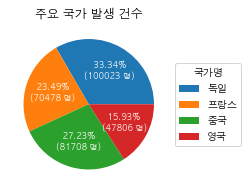

In [11]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)

# 나타내고자 하는 data
print(data1.columns)
print('-'*30)
my_concern = [item for item in data1.index if item in ['독일', '프랑스', '중국', '영국']]
print(my_concern)
pie_data = data1.loc[my_concern]
print(pie_data)
print('-'*30)

chartdata = pie_data['4월06일']
print(chartdata)
print('-'*30)
print(type(chartdata))
print('-'*30)

# pie chart의 label => 각 국가의 이름이 담긴 List
label = chartdata.index
print(label)
print('-'*30)

colors = ['blue', '#6AFF00', 'yellow', '#FF003C']



# ax는 실제 chart를 그릴 때 필요한 인수 - 축
# figsize = (가로 6inch, 세로 3inch)
# dict(aspect="equal") : 실제 데이터의 x, y 비율을 동일하게 설정한다
fig2, ax = plt.subplots(figsize=(6, 3), subplot_kw = dict(aspect="equal"))

def getLabelFormat(pct, allvals):
    absolute = int(pct/100*np.sum(allvals)) # 인원이 나옴 - 데이터를 그대로 읽어도 됨
    return "{: .2f}%\n ({:d} 명)".format(pct, absolute)

# autopct를 lambda 함수를 이용
wedges, texts, autotexts = ax.pie(chartdata, autopct=lambda pct: getLabelFormat(pct, chartdata),
                                 textprops = dict(color="w")) # 글씨 색상을 white

# center left 점을 기준으로 x축으로 1, y축으로 0, bbox_to_anchor = (x, y, width, height)
ax.legend(wedges, label, title = "국가명", loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight = "bold")

ax.set_title("주요 국가 발생 건수")

# plt.show()
FileSave()

# 도넛 모양 pie chart

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
[100024  70478  81708  47806 128948]
------------------------------
ang :  1.9716331362724304
ang :  73.5169380903244
ang :  137.37656354904175
ang :  191.7226618528366
ang :  265.8914005756378
Pie_chart_03.png파일이 저장되었습니다.


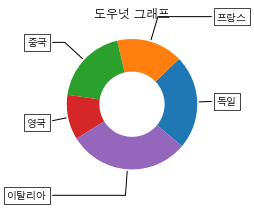

In [12]:
# data load
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)


# draw chart
fig3, ax = plt.subplots(figsize=(6, 3), subplot_kw = dict(aspect="equal"))

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
pie_data = data1.loc[COUNTRY, ['4월06일']]
print(pie_data.values.flatten()) # 값을 펼쳐서 배열로 만드는 과정
print('-'*30)

# wedgeprops = dict(width = 0.9)라면 가운데에 반지름이 0.1인 빈 공간이 생김
wedges, texts = ax.pie(pie_data.values.flatten(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    print('ang : ', ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    connectionstyle = "angle,angleA=0,angleB={}".format(ang)

    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(COUNTRY[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


ax.set_title("도우넛 그래프")

# plt.show()
FileSave()

# 중첩된 Pie graph

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
------------------------------
['이탈리아', '독일', '프랑스', '중국', '영국']
       4월06일   4월07일
국가                  
이탈리아  128948  132547
독일    100024  102453
프랑스    70478   74390
중국     81708   81740
영국     47806   51608
------------------------------
chartdata : 
 [[128948 13

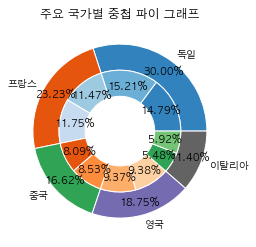

In [13]:
# data
data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)
print('-'*30)

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
my_concern = [item for item in data1.index if item in COUNTRY]
print(my_concern)

pie_data = data1.loc[my_concern]

filtered_data = pie_data[['4월06일', '4월07일']]

print(filtered_data)
print('-'*30)


# 차트를 그릴 중첩 데이터
totallist = []
for key in filtered_data.index.values :
       imsi = filtered_data.loc[key].values
       totallist.append([item for item in imsi])
chartdata = np.array(totallist)
print('chartdata : \n', chartdata)


# 색상의 개수
color_su = len(COUNTRY)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(color_su)*4)
inner_colors = cmap(np.arange(2*color_su))
print('inner_colors :', inner_colors)
print('outer_colors :', outer_colors)


# 누적 개수
cum_sum = chartdata.sum(axis=1)
print('cum_sum: ', cum_sum)




# draw pie chart
fig4, ax = plt.subplots()

# 숫자가 적을 수록 가운데 비어있는 원이 커짐
INNER_VACANT_CIRCLE_SIZE = 0.3

# 비율을 보여주는 위치 - 원점에서의 거리
OUTER_PCTDISTANCE = 0.85

# edgecolor='w', 'None'
ax.pie(cum_sum, radius=1, colors=outer_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       labels=COUNTRY, autopct='%.2f%%', pctdistance=OUTER_PCTDISTANCE)

INNER_PCTDISTANCE = 0.75

ax.pie(chartdata.flatten(), radius=1-INNER_VACANT_CIRCLE_SIZE, colors=inner_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       autopct='%.2f%%', pctdistance=INNER_PCTDISTANCE)

ax.set(aspect="equal", title='주요 국가별 중첩 파이 그래프')


# plt.show()
FileSave()

# 관심 있는 데이터 빼기

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
------------------------------
my_concern :  ['독일', '프랑스', '중국']
------------------------------
filtered_data : 
       4월06일   4월07일   4월08일
국가                         
독일   100024  102453  107591
프랑스   70478   74390   78167
중국    81708   81740   81802
--------------

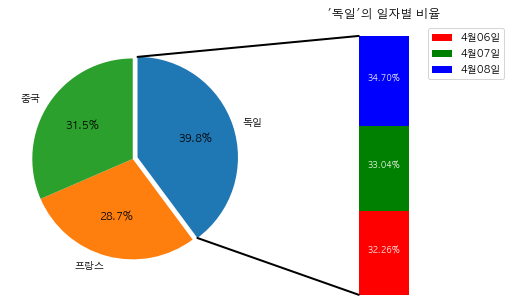

In [14]:
fig5 = plt.figure(figsize=(9, 5))
ax1 = fig5.add_subplot(121)
ax2 = fig5.add_subplot(122)
fig5.subplots_adjust(wspace=0)

# data
data = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data)
print('-'*30)

COUNTRY = ['독일', '프랑스', '중국'] # 관심 국가 목록
my_concern = [item for item in data.index if item in COUNTRY]
print('my_concern : ', my_concern)
print('-'*30)
data = data.loc[my_concern]

when = ['4월06일', '4월07일', '4월08일'] # 관심 일자 목록
filtered_data = data[when] # 파이 차트에 그려질 데이터
print('filtered_data : \n', filtered_data)
print('-'*30)


pieData = filtered_data.sum(axis=1).values # 국가별 총합
barData = filtered_data.loc['독일'].values
barData = barData/sum(barData)
print('pieData : ', pieData)
print('-'*30)
print('barData : ', barData)
print('-'*30)


# pie chart 관련 변수 리스트
explode = [0 for idx in range(len(pieData))]
explode[0] = 0.05
print('explode : ', explode)
print('-'*30)

# rotate so that first wedge is split by the x-axis
# 막대 그래프를 우측에 그릴 것이므로, 시작 각도는 90도로 지정하고 counterclock=False의 값으로 지정하면 좋습니다.
STARTANGLE = 90
print('STARTANGLE : ', STARTANGLE)
print('-'*30)
ax1.pie(pieData, autopct='%1.1f%%', startangle=STARTANGLE,
        labels=COUNTRY, explode=explode, counterclock=False)

# bar chart 관련 변수
xpos = 0
bottom = 0
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]
colors = ['r', 'g', 'b']

for j in range(len(barData)):
    height = barData[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() * 100),
             ha='center', fontsize=8, color='w')

ax2.set_title("'" + COUNTRY[0] + "'의 일자별 비율")
ax2.legend((when))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

LINE_WIDTH = 2 # 연결선의 두께


from matplotlib.patches import ConnectionPatch

# 상단의 연결선
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(LINE_WIDTH)
ax2.add_artist(con)

# 하단의 연결선
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(LINE_WIDTH)

# plt.show()
FileSave()

In [15]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.savefig(fig3)
pdfsave.savefig(fig4)
pdfsave.savefig(fig5)
pdfsave.close()